# Load Simple Workflow

## Plot

In [1]:
from python_workflow_definition.plot import plot

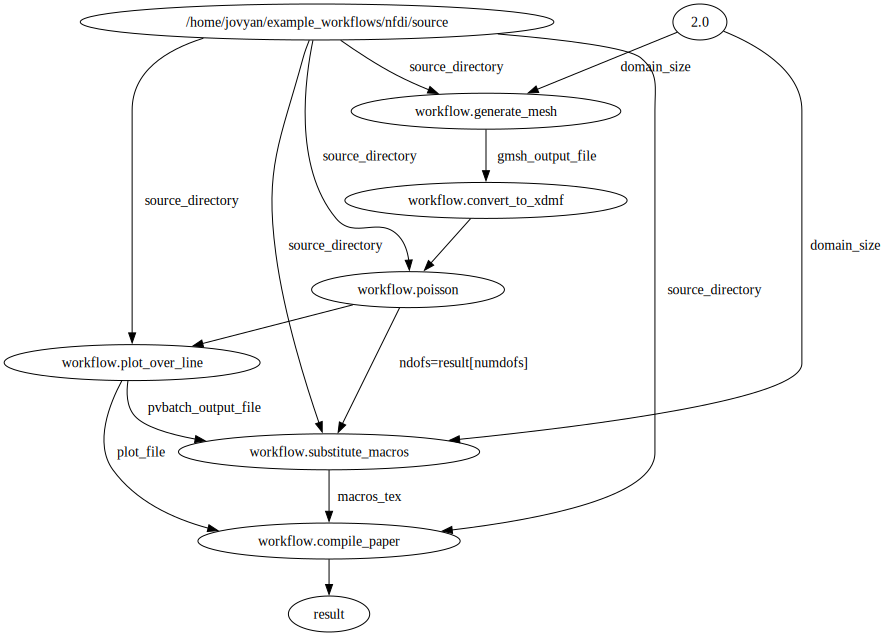

In [2]:
plot(file_name='workflow.json')

## Aiida 

In [3]:
from python_workflow_definition.aiida import load_workflow_json

from aiida import load_profile
load_profile()

Profile<uuid='3ce302a995914d2e8a7b6327a10fe381' name='pwd'>

In [4]:
workgraph = load_workflow_json(file_name='workflow.json')

In [5]:
# TODO: Create inputs rather than tasks out of data nodes
workgraph

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'WorkGra…

In [6]:

workgraph.run()

05/24/2025 05:45:59 AM <5606> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [111|WorkGraphEngine|continue_workgraph]: tasks ready to run: generate_mesh1
05/24/2025 05:46:01 AM <5606> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [111|WorkGraphEngine|update_task_state]: Task: generate_mesh1, type: PyFunction, finished.
05/24/2025 05:46:01 AM <5606> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [111|WorkGraphEngine|continue_workgraph]: tasks ready to run: convert_to_xdmf2
05/24/2025 05:46:03 AM <5606> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [111|WorkGraphEngine|update_task_state]: Task: convert_to_xdmf2, type: PyFunction, finished.
05/24/2025 05:46:03 AM <5606> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [111|WorkGraphEngine|continue_workgraph]: tasks ready to run: poisson3
05/24/2025 05:46:06 AM <5606> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [111|Wo

## executorlib

In [7]:
from executorlib import SingleNodeExecutor

In [8]:
from python_workflow_definition.executorlib import load_workflow_json

In [9]:
with SingleNodeExecutor(max_workers=1) as exe:
    result = load_workflow_json(file_name="workflow.json", exe=exe).result()

In [10]:
result

'/home/jovyan/example_workflows/nfdi/postprocessing/paper.pdf'

## Jobflow

In [11]:
from jobflow.managers.local import run_locally

In [12]:
from python_workflow_definition.jobflow import load_workflow_json

In [13]:
flow = load_workflow_json(file_name="workflow.json")

In [14]:
result = run_locally(flow)
result

2025-05-24 05:46:27,374 INFO Started executing jobs locally
2025-05-24 05:46:27,453 INFO Starting job - generate_mesh (e65df967-702e-4def-9172-6be0b3b95604)
2025-05-24 05:46:28,600 INFO Finished job - generate_mesh (e65df967-702e-4def-9172-6be0b3b95604)
2025-05-24 05:46:28,601 INFO Starting job - convert_to_xdmf (173b17f6-c6d6-4002-81f3-fdc267be7837)
2025-05-24 05:46:29,943 INFO Finished job - convert_to_xdmf (173b17f6-c6d6-4002-81f3-fdc267be7837)
2025-05-24 05:46:29,944 INFO Starting job - poisson (91e67802-de2e-462d-a076-536c2e874b0b)
2025-05-24 05:46:32,711 INFO Finished job - poisson (91e67802-de2e-462d-a076-536c2e874b0b)
2025-05-24 05:46:32,712 INFO Starting job - plot_over_line (5094148b-2ae8-4f88-bbf3-73b68fe02fb1)
2025-05-24 05:46:34,138 INFO Finished job - plot_over_line (5094148b-2ae8-4f88-bbf3-73b68fe02fb1)
2025-05-24 05:46:34,139 INFO Starting job - substitute_macros (8badd91e-4495-491e-b978-0b1abac4c680)
2025-05-24 05:46:34,939 INFO Finished job - substitute_macros (8badd9

{'e65df967-702e-4def-9172-6be0b3b95604': {1: Response(output='/home/jovyan/example_workflows/nfdi/preprocessing/square.msh', detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan/example_workflows/nfdi'))},
 '173b17f6-c6d6-4002-81f3-fdc267be7837': {1: Response(output={'xdmf_file': '/home/jovyan/example_workflows/nfdi/preprocessing/square.xdmf', 'h5_file': '/home/jovyan/example_workflows/nfdi/preprocessing/square.h5'}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan/example_workflows/nfdi'))},
 '91e67802-de2e-462d-a076-536c2e874b0b': {1: Response(output={'numdofs': 357, 'pvd_file': '/home/jovyan/example_workflows/nfdi/processing/poisson.pvd', 'vtu_file': '/home/jovyan/example_workflows/nfdi/processing/poisson000000.vtu'}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_

## pyiron

In [15]:
from python_workflow_definition.pyiron_base import load_workflow_json

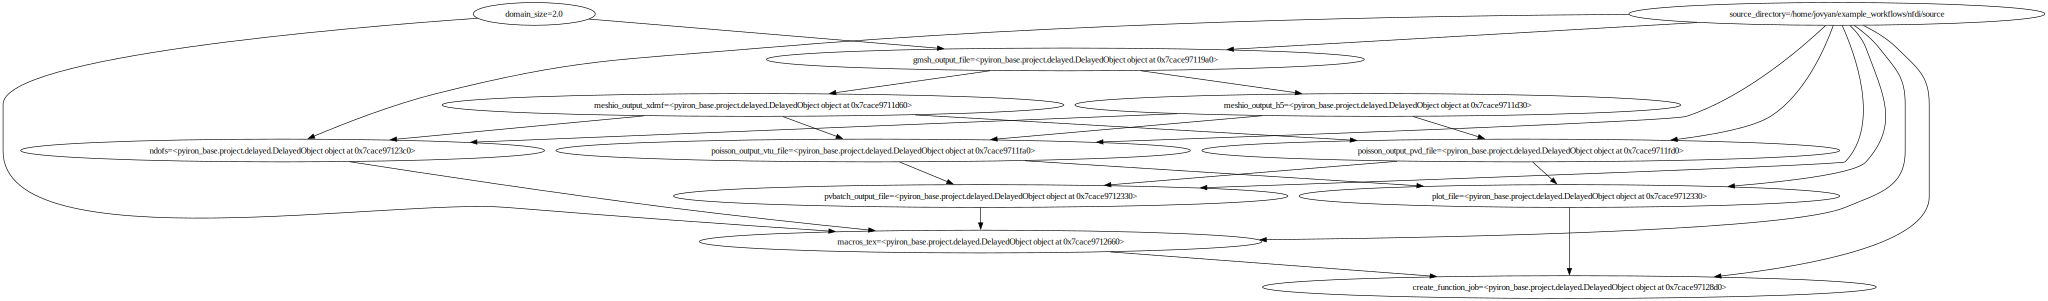

In [16]:
delayed_object_lst = load_workflow_json(file_name="workflow.json")
delayed_object_lst[-1].draw()

In [17]:
delayed_object_lst[-1].pull()

The job generate_mesh_47725c16637f799ac042e47468005db3 was saved and received the ID: 1
The job convert_to_xdmf_d6a46eb9a4ec352aa996e783ec3c785f was saved and received the ID: 2
The job poisson_3c147fc86db87cf0c0f94bda333f8cd8 was saved and received the ID: 3
The job plot_over_line_ef50933291910dadcc8311924971e127 was saved and received the ID: 4
The job substitute_macros_63766eafd6b1980c7832dd8c9a97c96e was saved and received the ID: 5
The job compile_paper_128d1d58374953c00e95b8de62cbb10b was saved and received the ID: 6


'/home/jovyan/example_workflows/nfdi/postprocessing/paper.pdf'

## Python

In [18]:
from python_workflow_definition.purepython import load_workflow_json

In [19]:
load_workflow_json(file_name="workflow.json")

'/home/jovyan/example_workflows/nfdi/postprocessing/paper.pdf'